In [1]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import glob
from numpy import transpose as T
from numpy import genfromtxt as gftxt
from pathlib import Path as Path
import datetime
import os
import warnings

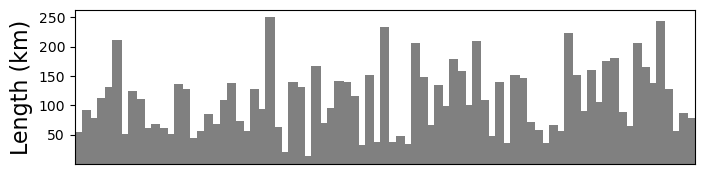

In [6]:
lengths_pd = pd.read_csv('.../Segment_Lengths')
lengths = sorted_lengths_pd['Length (km)'].round(0).astype(int)

# Creating the bar chart
fig1, ax1 = plt.subplots(figsize=(8, 2))
plt.rcParams['ytick.labelsize']=12
plt.bar(range(len(lengths)), lengths, color='grey', width=1.2)

# Adding labels and title
plt.ylabel('Length (km)',fontsize=16)
ax1.set_xticks([])
ax1.set_xlim([-0.5,80.5])
ax1.set_yticks([50,100,150,200,250])
plt.show()


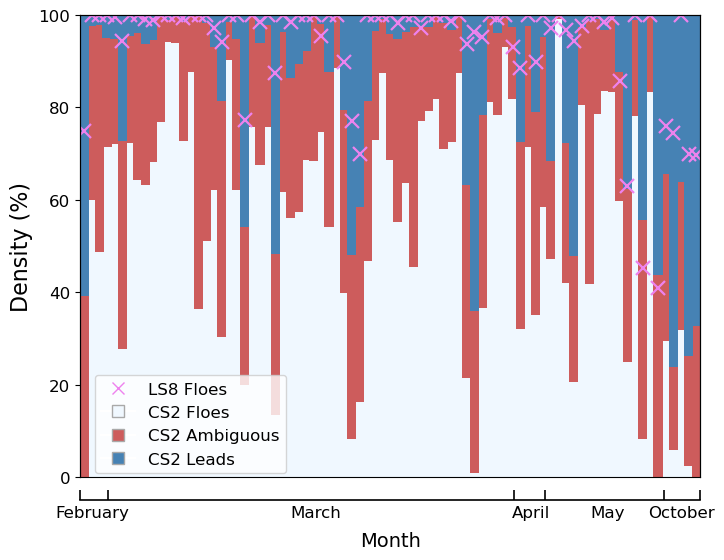

In [7]:
dataframe = pd.read_csv('CS2_LS8_Percentages.csv')

stacked_df = dataframe[['CS2 Floe Percentage', 'CS2 Ambig Percentage',
                        'CS2 Lead Percentage']]

colors = ['aliceblue', 'indianred', 'steelblue']

# Plot CS2 stacked bars
fig1, ax1 = plt.subplots(figsize=(8, 6))

# Set axis label size
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

stacked_df.plot(kind='bar', stacked=True, ax=ax1, width=1.2, color=colors) 


# Plot LS8 Points
ax1.plot(dataframe['LS8 Floe Percentage'],marker='x', color='violet',linestyle='none',
                markersize=10, markeredgewidth=1.6, dash_capstyle='round')


# Set y label
ax1.set_ylabel('Density (%)', fontsize=16)
ax1.set_xticks([])
ax1.set_ylim([0,100])
ax1.set_xlim([-0.5,80.5])

# Set grouped x label
ax2 = ax1.twiny()

ax2.spines["bottom"].set_position(("axes", -0.05))
ax2.spines["bottom"].set_linewidth(1.2) 

ax2.tick_params('both', length=0, width=0, which='minor')
ax2.tick_params('both', direction='in', which='major',width=1.2,length=7)
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")

ax2.set_xticks([0.0, 0.045,0.7,0.75,0.942,1.0])
ax2.xaxis.set_major_formatter(ticker.NullFormatter())
ax2.xaxis.set_minor_locator(ticker.FixedLocator([0.02, 0.38,0.728,0.85,0.97]))
ax2.xaxis.set_minor_formatter(ticker.FixedFormatter(['February', 'March','April','May','October']))
ax2.set_xlabel('Month', fontsize=14, labelpad=8) 


# Set legend
ls8floesymbol = plt.Line2D([0], [0], marker='x', color='violet', markersize=8,linestyle='None')
cs2floesymbol = plt.Line2D([0], [0], marker='s', color='w', markersize=8, markerfacecolor='aliceblue', markeredgecolor='darkgrey')
cs2ambigsymbol = plt.Line2D([0], [0], marker='s', color='w', markersize=8, markerfacecolor='indianred', markeredgecolor='darkgrey')
cs2leadsymbol = plt.Line2D([0], [0], marker='s', color='w', markersize=8, markerfacecolor='steelblue', markeredgecolor='darkgrey')
legend_handles = (ls8floesymbol,cs2floesymbol,cs2ambigsymbol,cs2leadsymbol)

lgd_items = ('LS8 Floes','CS2 Floes','CS2 Ambiguous','CS2 Leads')
legend = ax1.legend(handles=legend_handles, labels=lgd_items, fontsize=12, bbox_to_anchor=(0.01, -0.01), loc='lower left')


plt.show()
